# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 6)
import seaborn as sns

# Data Information

In [2]:
# https://www.kaggle.com/datasets/ashishjangra27/pubg-games-dataset/data
df = pd.read_csv("PUBG_Game_Prediction_data.csv")
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.shape

(4446966, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data Wrangling

## Handling Nulls

In [5]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
df.drop(2744604, inplace=True)

## Data Analyzing

#### Number of players in matches

In [8]:
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


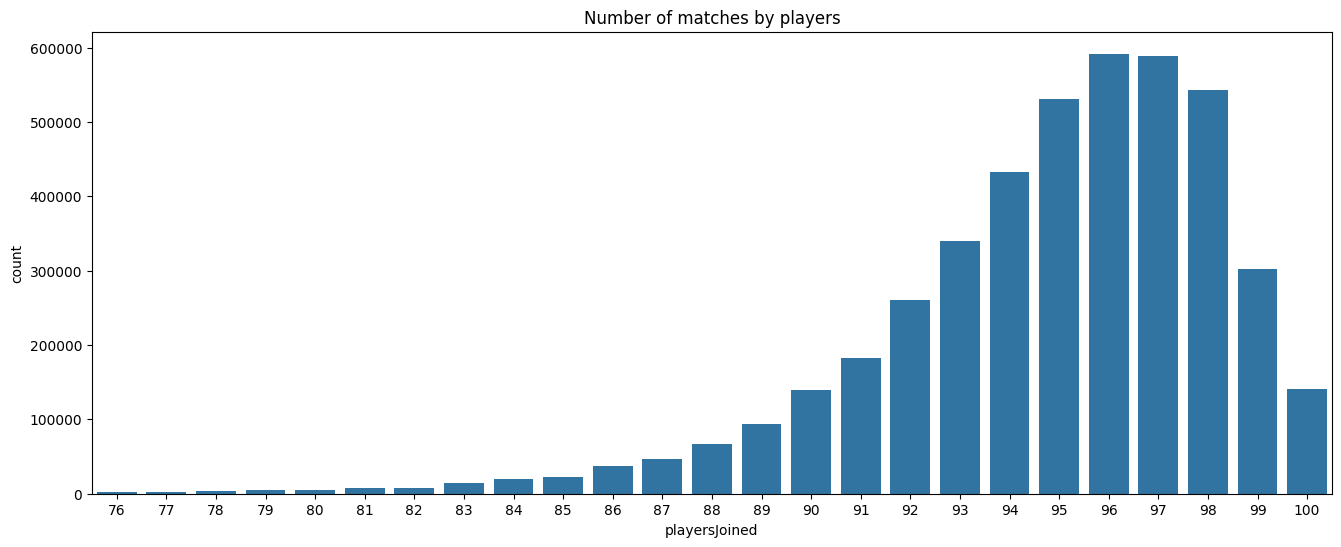

In [9]:
sns.countplot(x=df[df['playersJoined'] > 75]['playersJoined']).set_title('Number of matches by players')
plt.show()

### Removing cheaters

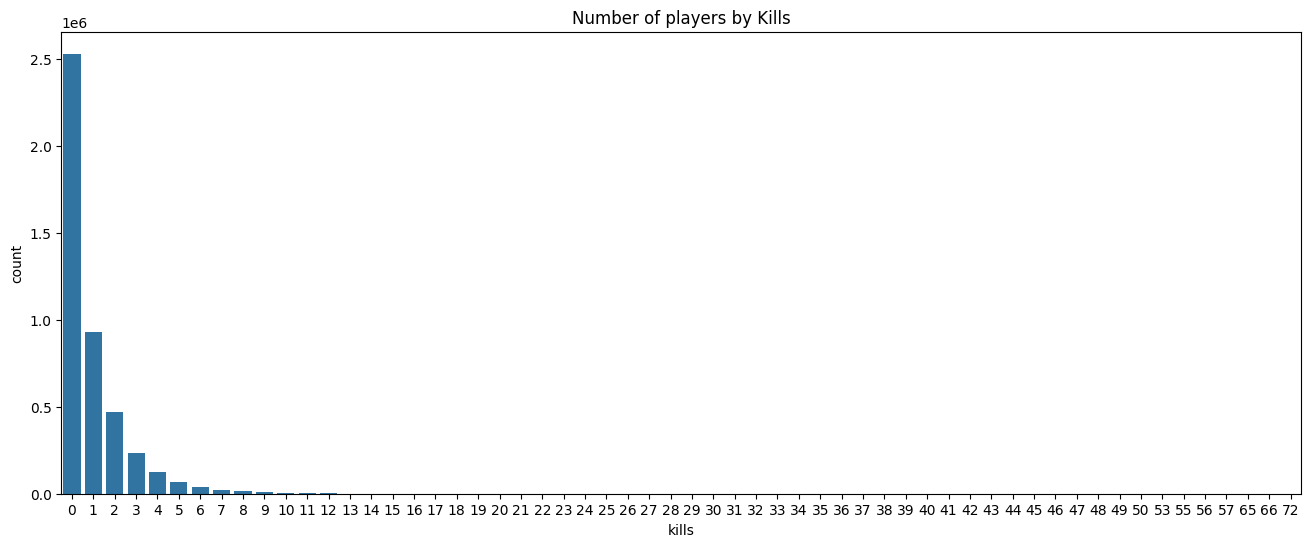

In [10]:
sns.countplot(x=df['kills']).set_title('Number of players by Kills')
plt.show()

#### Kills without moving

In [11]:
df['totalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
df[(df['totalDistance'] == 0) & (df['kills'] > 0)].shape

(1535, 31)

In [12]:
df = df.drop(df[(df['totalDistance'] == 0) & (df['kills'] > 0)].index)
df.shape

(4445430, 31)

#### Too many kills

In [13]:
df = df.drop(df[df['kills'] > 20].index)
df.shape

(4445013, 31)

#### Too many road kills

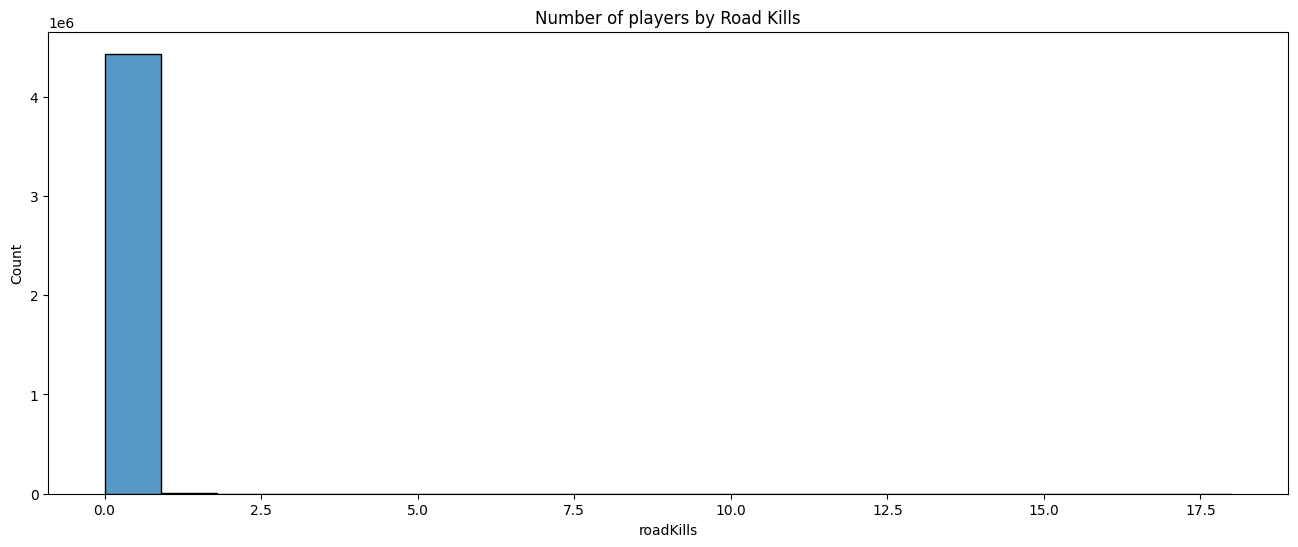

In [14]:
sns.histplot(x=df['roadKills'], bins=20).set_title('Number of players by Road Kills')
plt.show()

In [15]:
df[df['roadKills'] > 5].shape

(46, 31)

In [16]:
df = df.drop(df[df['roadKills'] > 5].index)
df.shape

(4444967, 31)

#### Headshot

In [17]:
df['headshotRate'] = df['headshotKills'] / df['kills']
df['headshotRate'] = df['headshotRate'].fillna(0)

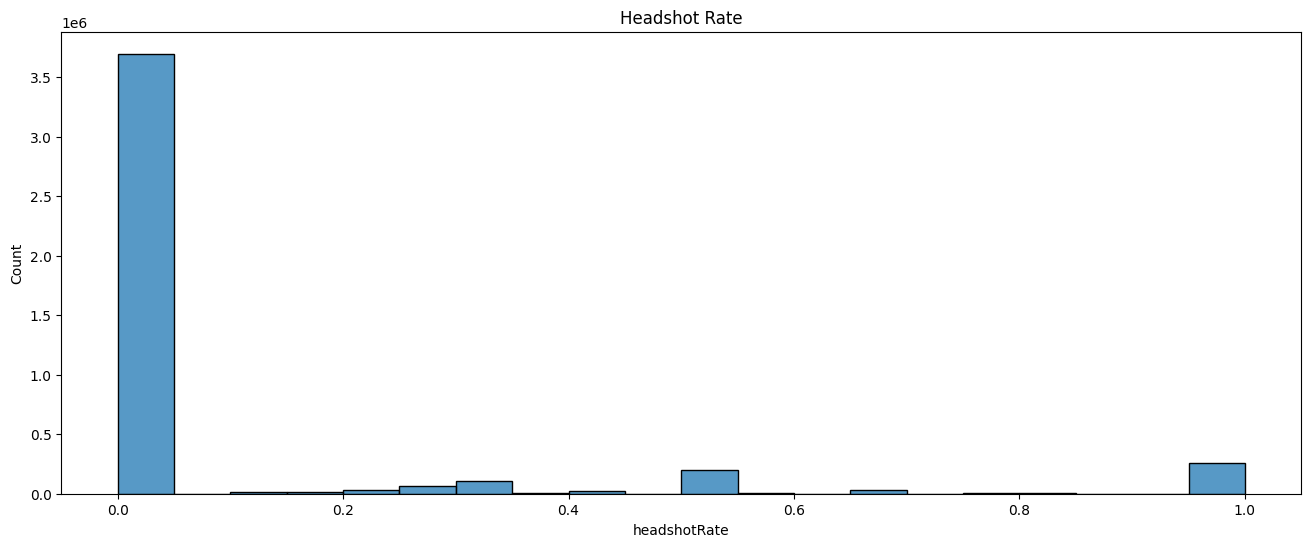

In [18]:
sns.histplot(x=df['headshotRate'], bins=20).set_title('Headshot Rate')
plt.show()

In [19]:
df = df.drop(df[(df['headshotRate'] == 1) & (df['kills'] >= 5)].index)
df.shape

(4444541, 32)

#### Long distance kills

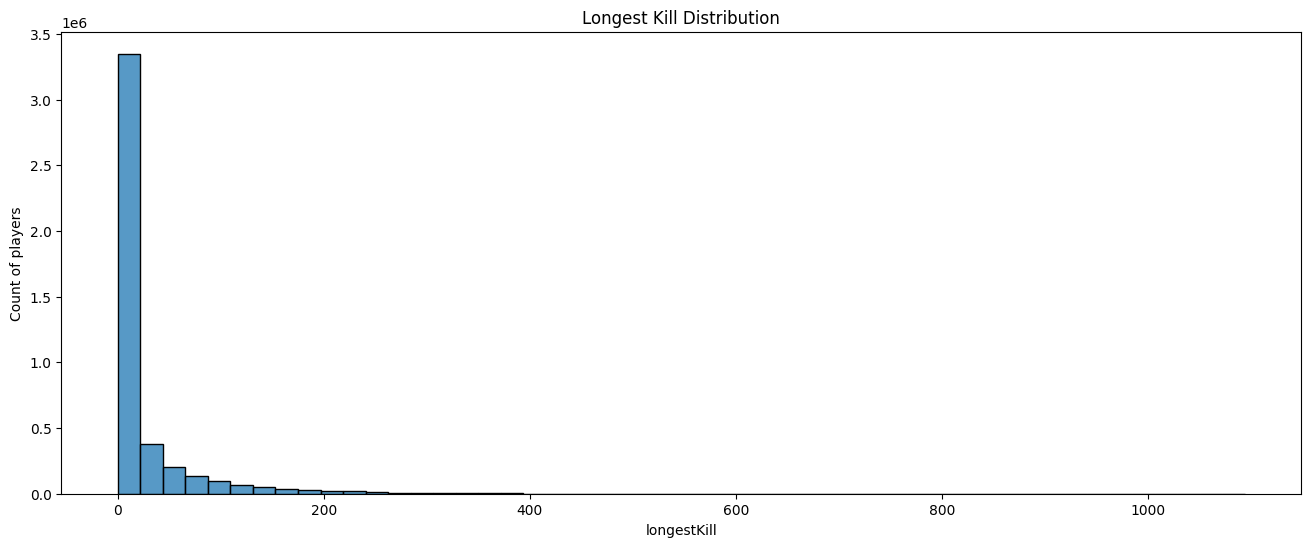

In [20]:
sns.histplot(df['longestKill'], bins=50).set_title("Longest Kill Distribution")
plt.ylabel("Count of players")
plt.show()

In [21]:
df = df.drop(df[df['longestKill'] > 500].index)

#### Too many weapons

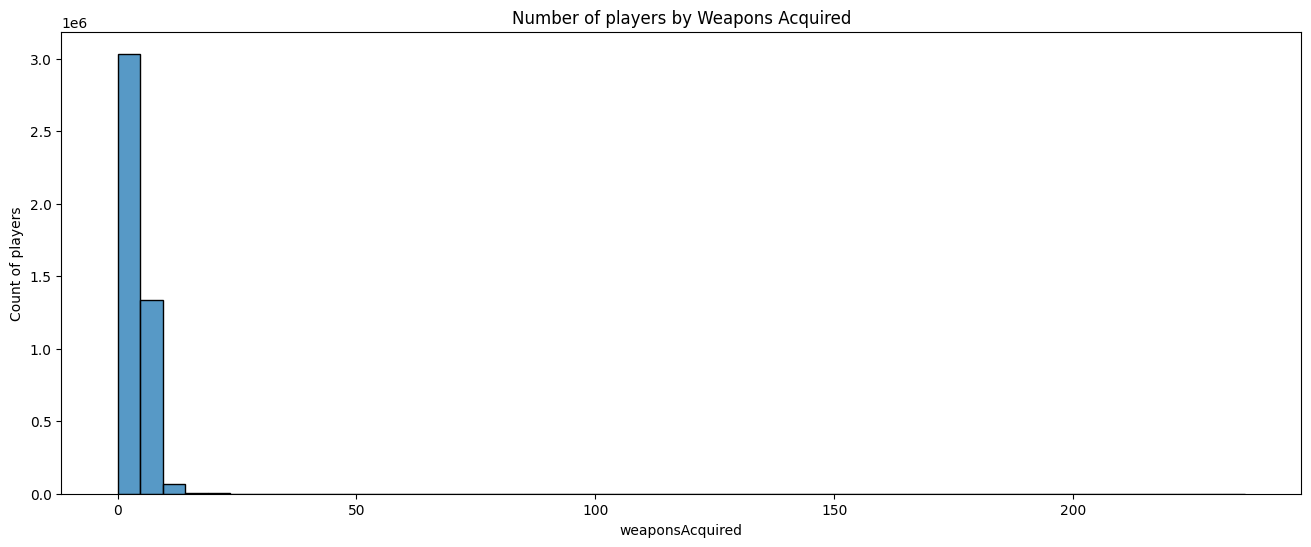

In [22]:
sns.histplot(df['weaponsAcquired'], bins=50).set_title("Number of players by Weapons Acquired")
plt.ylabel("Count of players")
plt.show()

In [23]:
df = df.drop(df[df['weaponsAcquired']>=15].index)
df.shape

(4436006, 32)

### EDA

In [24]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,headshotRate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.000,0,0,244.80,1,1466,0.4444,96,244.8000,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.040,0,0,1434.00,5,0,0.6400,91,1445.0445,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.000,0,0,161.80,2,0,0.7755,98,161.8000,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.000,0,0,202.70,3,0,0.1667,91,202.7000,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.000,0,0,49.75,2,0,0.1875,97,49.7500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0.000,0,0,1019.00,3,1507,0.1786,94,2311.0000,0.0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.000,0,0,81.70,6,0,0.2935,93,81.7000,0.0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,2.184,0,0,788.70,4,0,0.4815,98,790.8840,0.0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.000,0,0,2748.00,8,0,0.8000,94,2748.0000,0.5


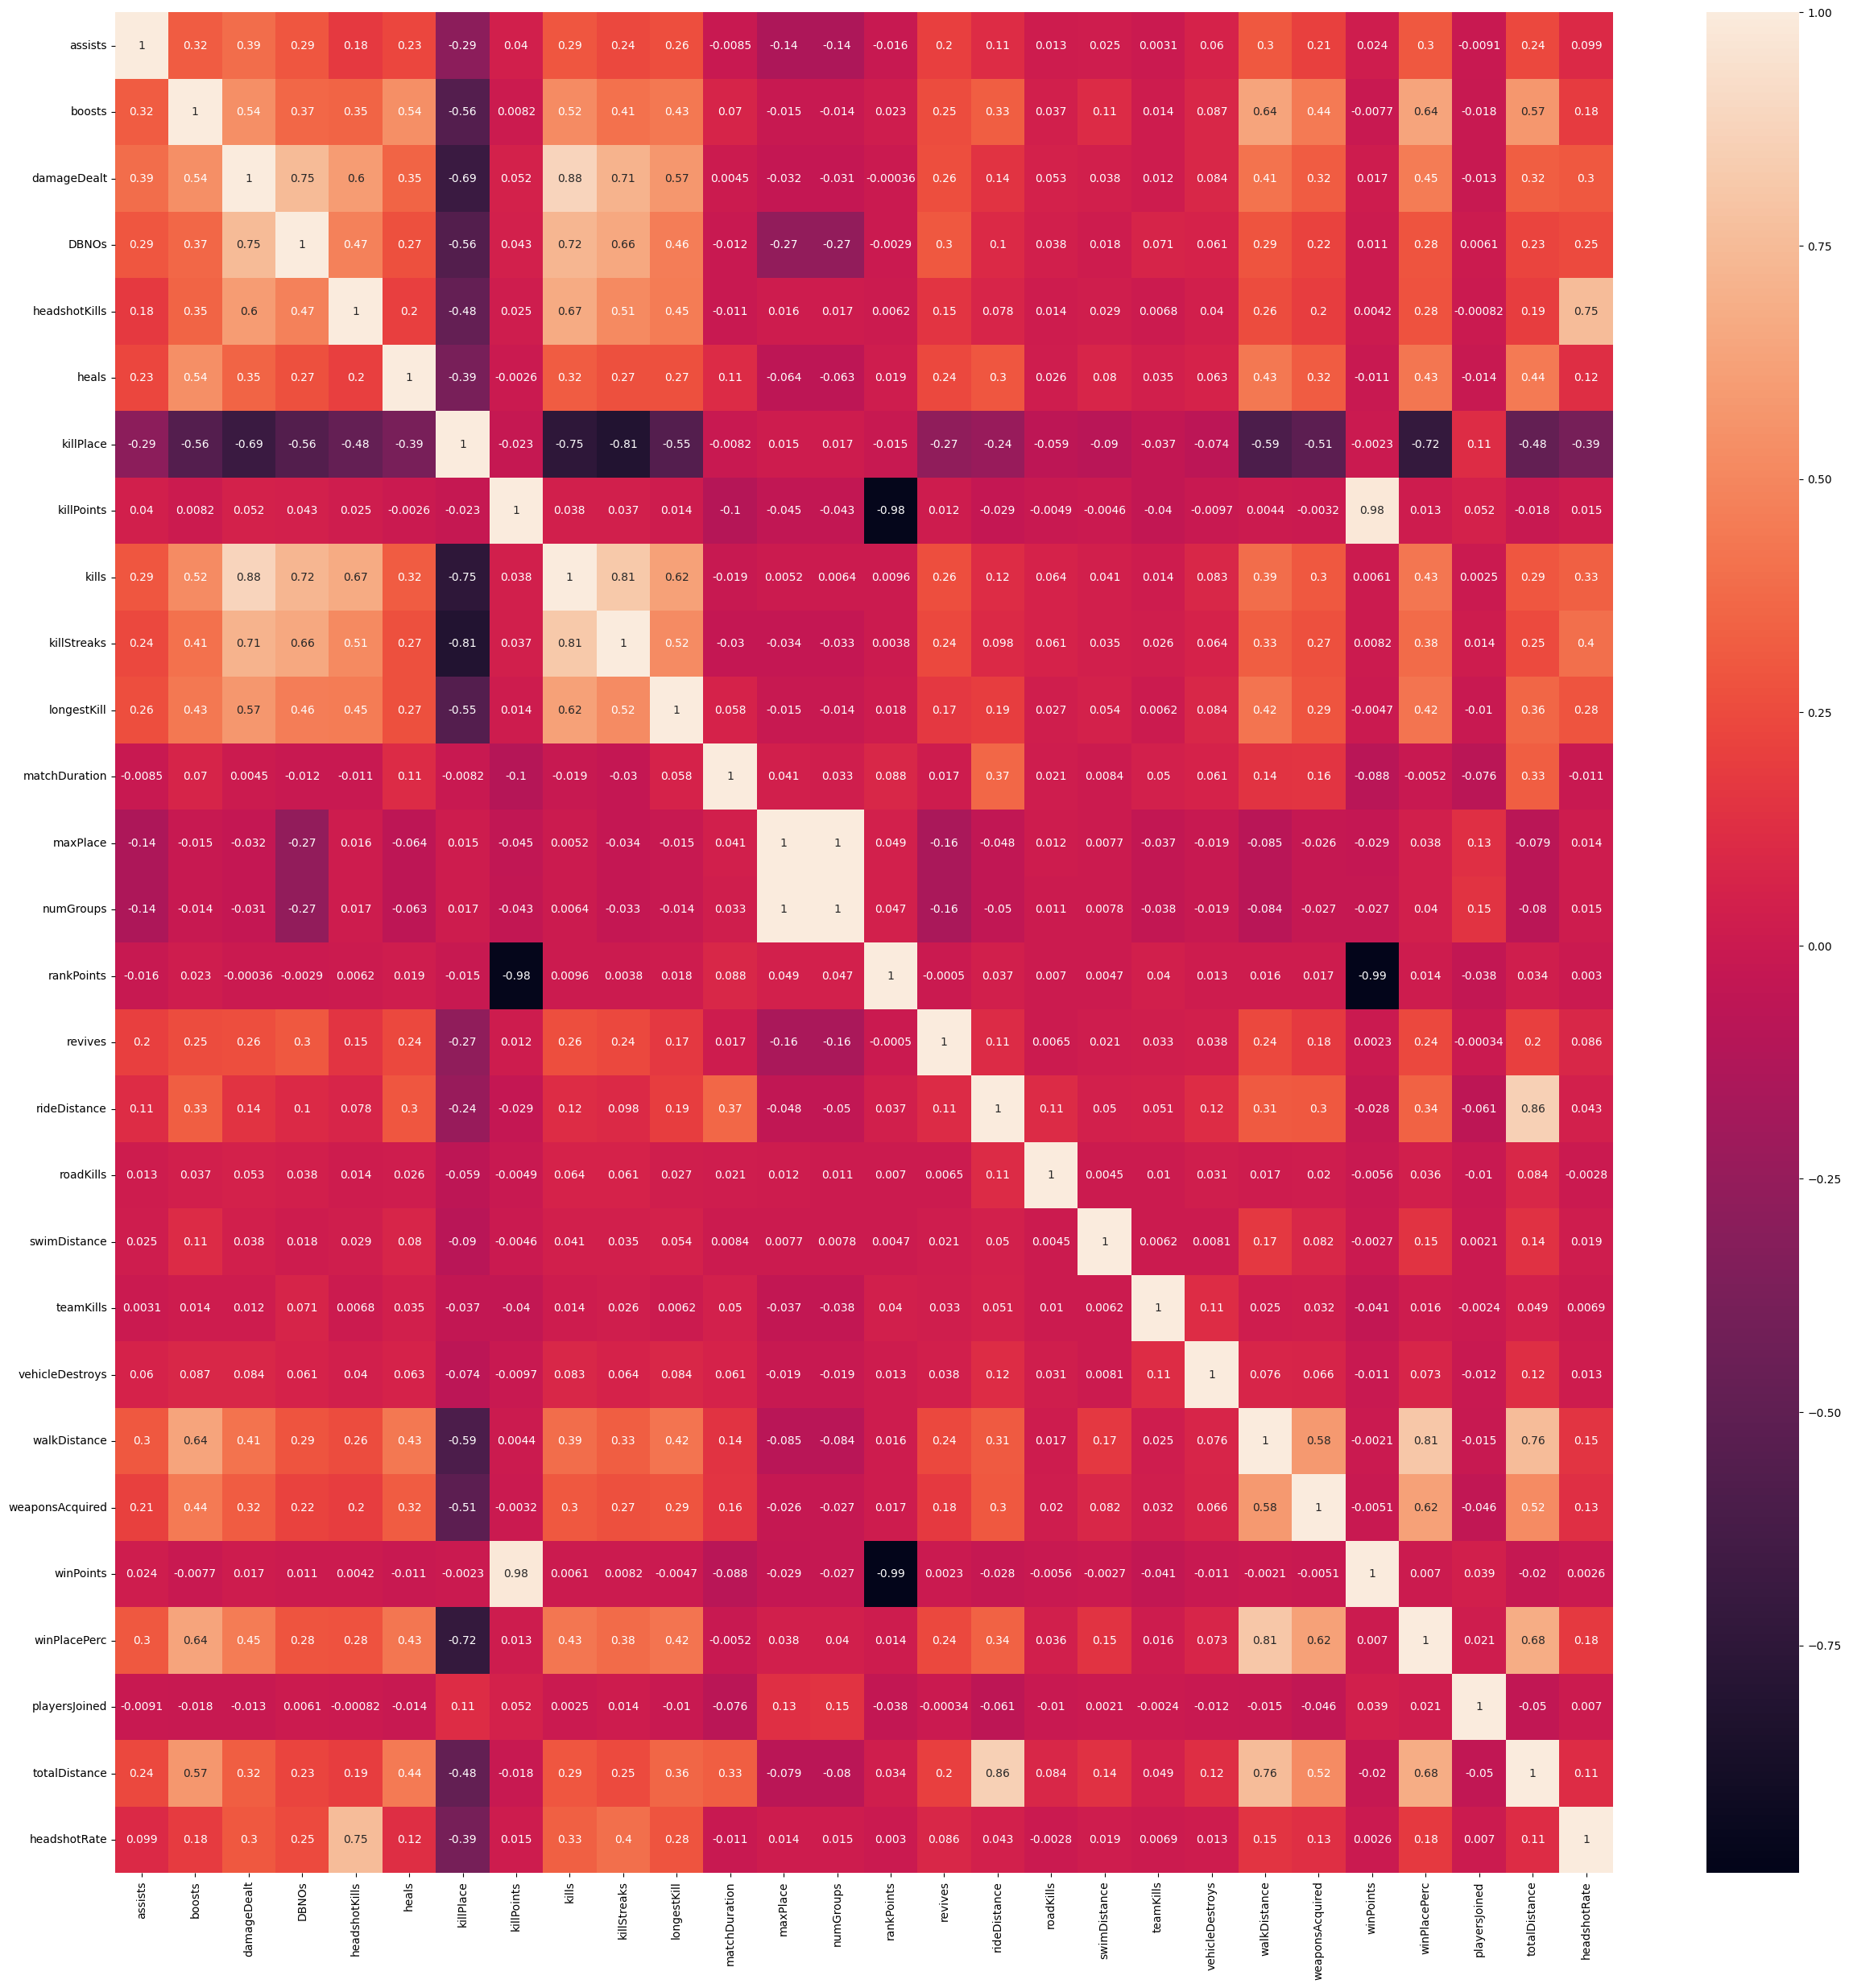

In [25]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Feature Engineering

In [26]:
df['killsNorm'] = df['kills'] / df['playersJoined']
df['damageDealtNorm'] = df['damageDealt'] / df['playersJoined']
df['maxPlaceNorm'] = df['maxPlace'] / df['playersJoined']
df['matchDurationNorm'] = df['matchDuration'] / df['playersJoined']

df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [27]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,winPlacePerc,playersJoined,totalDistance,headshotRate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,0.4444,96,244.8000,0.0,0.000000,0.000000,0.291667,13.604167,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,0.6400,91,1445.0445,0.0,0.000000,1.005165,0.285714,19.527473,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,0.7755,98,161.8000,0.0,0.000000,0.693878,0.510204,13.448980,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,0.1667,91,202.7000,0.0,0.000000,0.361538,0.340659,15.780220,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,0.1875,97,49.7500,0.0,0.010309,1.030928,1.000000,14.680412,0,0


# Machine Learing

## Preparing Data

In [46]:
x = data.drop(columns=['winPlacePerc'])
y = data['winPlacePerc']

In [47]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3)

## CatBoost Model

In [49]:
import catboost as cb
from sklearn.model_selection import GridSearchCV

In [50]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playersJoined', 'totalDistance', 'headshotRate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'healsnboosts', 'assist'],
      dtype='object')

In [51]:
categorical_features = ['matchType']
train = cb.Pool(xtrain, ytrain, cat_features=categorical_features)
test = cb.Pool(xtest, ytest, cat_features=categorical_features)

In [52]:
model = cb.CatBoostRegressor()

grid = {'iterations': [150, 200, 250], 
       'learning_rate': [0.03, 0.05, 0.1, 0.15], 
       'depth': [6, 8, 10]}

model.grid_search(grid, train)

0:	learn: 0.5476720	test: 0.5477296	best: 0.5477296 (0)	total: 301ms	remaining: 44.9s
1:	learn: 0.5322978	test: 0.5323559	best: 0.5323559 (1)	total: 481ms	remaining: 35.6s
2:	learn: 0.5174373	test: 0.5174976	best: 0.5174976 (2)	total: 612ms	remaining: 30s
3:	learn: 0.5030472	test: 0.5031104	best: 0.5031104 (3)	total: 932ms	remaining: 34s
4:	learn: 0.4890934	test: 0.4891573	best: 0.4891573 (4)	total: 1.06s	remaining: 30.8s
5:	learn: 0.4755746	test: 0.4756424	best: 0.4756424 (5)	total: 1.2s	remaining: 28.7s
6:	learn: 0.4624912	test: 0.4625608	best: 0.4625608 (6)	total: 1.33s	remaining: 27.3s
7:	learn: 0.4497654	test: 0.4498301	best: 0.4498301 (7)	total: 1.5s	remaining: 26.6s
8:	learn: 0.4374633	test: 0.4375299	best: 0.4375299 (8)	total: 1.62s	remaining: 25.4s
9:	learn: 0.4256263	test: 0.4256970	best: 0.4256970 (9)	total: 1.74s	remaining: 24.4s
10:	learn: 0.4140771	test: 0.4141430	best: 0.4141430 (10)	total: 1.86s	remaining: 23.5s
11:	learn: 0.4029210	test: 0.4029856	best: 0.4029856 (11)	

{'params': {'depth': 10, 'learning_rate': 0.15, 'iterations': 250},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
  

In [53]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = x.columns
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by=['importance'], ascending=False)
feature_importance_df

,features,importance
2,killPlace,39.759939
15,totalDistance,21.930110
17,killsNorm,10.839496
20,matchDurationNorm,5.788541
4,killStreaks,5.246904
14,playersJoined,4.798800
7,numGroups,3.159177
5,longestKill,2.085438
21,healsnboosts,1.910505
19,maxPlaceNorm,0.992486


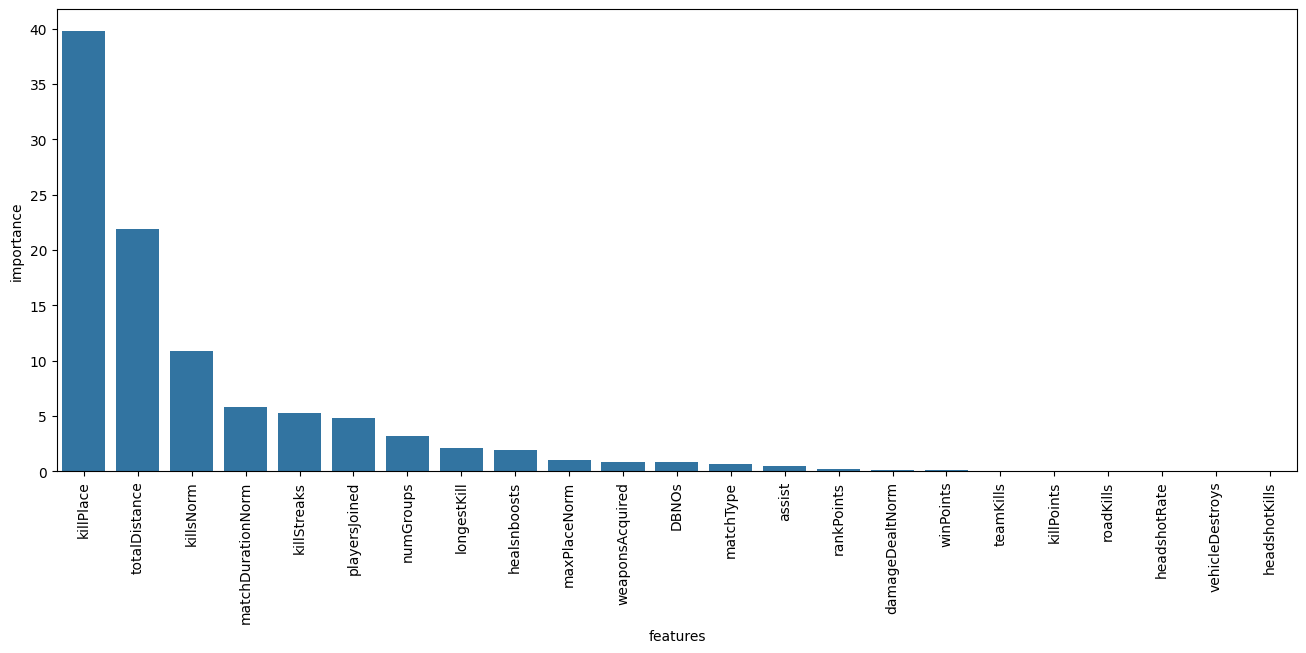

In [54]:
sns.barplot(data=feature_importance_df, x='features', y='importance')
plt.xticks(rotation=90)
plt.show()

## Prediction

In [55]:
print('Score:', round(model.score(xtest, ytest), 2))

Score: 0.93
